# Topic Modeling with CorEx

## Setup

In [1]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle 

# sklearn
from sklearn.feature_extraction.text import CountVectorizer

# corex
from corextopic import corextopic as ct
from corextopic import vis_topic as vt

# bespoke
from preprocessing_funcs import clean_tweet, get_hashtags, get_emojis

In [2]:
with open('../data_files/processed_tweets.pickle', 'rb') as read_file:
    df = pickle.load(read_file)

In [3]:
df.head()

,text,processed
0,#IslamKills Are you trying to say that there w...,islam kill try say terrorist attack europe ref...
1,"Clinton: Trump should’ve apologized more, atta...",clinton trump apologize attack little
2,RT @ltapoll: Who was/is the best president of ...,well president past retweet
3,RT @jww372: I don't have to guess your religio...,guess religion christmas aftermath
4,RT @Shareblue: Pence and his lawyers decided w...,pence lawyer decide official email public can see


## Topic Modeling

In [4]:
tweets = df.processed

In [5]:
anchor_topics = [['donald', 'trump', 'maga'],                                             # trump stuff
                ['hillary', 'clinton'],                                                  # hillary stuff
                ['merkel', 'muss', 'die', 'ist', 'ich', 'das'],                          # german stuff
                ['color', 'blm', 'black', 'matt', 'oscar', 'racism', 'blacktwitter'],    # BLM/race stuff
                ['police', 'officer', 'shoot'],                                          # police stuff
                ['obama', 'barack'],                                                     # obama stuff
                ['isis', 'muslim', 'islam']                                              # isis/islam stuff
               ]

len(anchor_topics)

7

In [6]:
vectorizer = CountVectorizer(max_features=60000,
                             token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

doc_word = vectorizer.fit_transform(tweets)
words = list(np.asarray(vectorizer.get_feature_names()))

In [7]:
topic_model = ct.Corex(n_hidden=10, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=tweets, 
                anchors=anchor_topics, anchor_strength=6)

In [8]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: trump, donald, maga, real, president, supporter, politic, train, rally, headline
1: hillary, clinton, email, campaign, crook, foundation, fbi, trust, wikileaks, benghazi
2: die, merkel, muss, ist, das, ich, sie, es, mit, den
3: black, matt, color, racism, oscar, blm, blacktwitter, live, white, oscars
4: police, shoot, officer, cop, suspect, san, arrest, man, brutality, dallas
5: obama, barack, michelle, administration, admin, legacy, iran, hussein, malia, pres
6: islam, isis, muslim, kill, brussels, refugee, prayforbrussels, opiceisis, iceisis, stop
7: tcot, pjnet, ccot, cruz, mt, america, reject, tea, ted, gop
8: news, election, poll, medium, post, new, report, state, dnc, cnn
9: midnight, play, nowplaying, music, ft, gt, game, sport, tim, song


In [9]:
# Let's check out topic : graphics
topic_model.get_top_docs(topic=0, n_docs=10)

[('trump give chelsea squirt orange', 0.0),
 ('real donald trump lie hillary want demand abortion trump life trump', 0.0),
 ('disculpeme vicentefoxque usted esta ofendido por la invitacion sr trump pero por esta desgracia suya',
  0.0),
 ('cub co owner todd ricketts meet donald trump', 0.0),
 ('donald trump defend tweet allow woman serve military politic', 0.0),
 ('real donald trump baby watch tv speech trumpbaby trump president', 0.0),
 ('watch trump putin want peace hillary want spend tax dollar war kill innocent',
  0.0),
 ('entire source claim reddit guy knucklehead trump idiot fall usual', 0.0),
 ('obama say gop fuel trump rise allow crazy talk politic', 0.0),
 ('miss white voter can elect trump \ufeff1 need register', 0.0)]

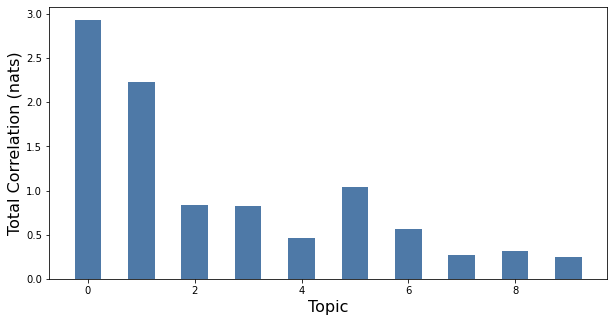

In [10]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)
plt.show()

In [11]:
topic_model.tc

9.711039602694878

In [19]:
anchor_topics = [['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['merkel', 'muss', 'die', 'ist', 'ich', 'das'],
                ]

len(anchor_topics)

9

In [21]:
vectorizer = CountVectorizer(#max_features=60000,
                             token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True,
                             stop_words='english')

doc_word = vectorizer.fit_transform(tweets)
words = list(np.asarray(vectorizer.get_feature_names()))

topic_model = ct.Corex(n_hidden=14, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=tweets, 
               anchors=anchor_topics, anchor_strength=5)

In [22]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: trump, donald, president, train, favorite, melania, celebrate, elect, inauguration, presidency
1: trump, donald, supporter, rally, endorse, great, remark, latinos, tape, mock
2: trump, donald, real, maga, poll, support, immigration, mexico, deplorables, ad
3: trump, donald, politic, headline, medium, tower, win, comment, ivanka, crowd
4: hillary, clinton, email, server, imwithher, haiti, scandal, private, lockherup, haitian
5: hillary, clinton, birther, podesta, blumenthal, mcclatchy, rumor, sid, pac, mook
6: hillary, clinton, crook, benghazi, lie, pneumonia, hillarys, health, basketofdeplorables, liar
7: hillary, clinton, campaign, foundation, fbi, trust, wikileaks, prison, birtherism, donor
8: die, merkel, muss, ist, das, ich, sie, es, mit, den
9: nowplaying, music, gt, play, ft, song, soundcloud, feat, artist, listen
10: midnight, topic, reject, gift, idea, politician, debate, fishtv, drunkbands, redneckamovie
11: police, guide, thanksgiving, shoot, survival, officer, cop, drain,

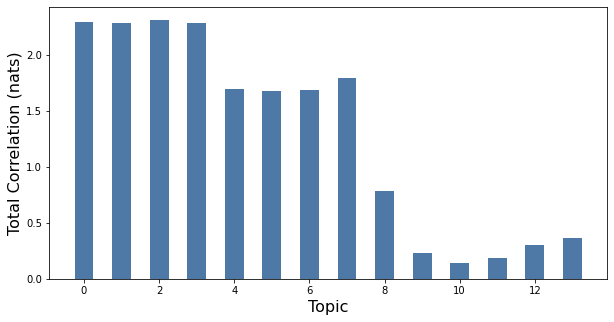

In [23]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)
plt.show()

In [24]:
topic_model.tc

18.041443100073394

In [25]:
anchor_topics = [['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['donald', 'trump'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['hillary', 'clinton'],
                 ['merkel', 'muss', 'die', 'ist', 'ich', 'das'],
                 ['police', 'officer', 'cop'],
                 ['barack', 'obama'], 
                 ['nowplaying', 'music', 'soundcloud']
                ]

len(anchor_topics)

12

In [26]:
topic_model = ct.Corex(n_hidden=16, 
                       words=words,
                       max_iter=200, 
                       seed=42)

topic_model.fit(doc_word, words=words, docs=tweets, 
               anchors=anchor_topics, anchor_strength=5)

In [27]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ', '.join(topic_words))

0: trump, donald, politic, supporter, maga, train, rally, support, mexico, deplorables
1: trump, donald, president, headline, favorite, melania, elect, comment, msm, hotel
2: trump, donald, celebrate, tower, endorse, inauguration, ivanka, accuser, wall, christie
3: trump, donald, real, poll, win, thingsnottaughtatschool, endorsement, cabinet, topvideo, electionday
4: hillary, clinton, email, campaign, crook, foundation, fbi, wikileaks, benghazi, lie
5: hillary, clinton, trust, server, birther, thing, corrupt, camp, scandal, clintonoriginalbirther
6: hillary, clinton, pneumonia, hillarys, health, imwithher, basketofdeplorables, billclinton, cover, diagnosis
7: hillary, clinton, prison, haiti, donation, classify, criminal, haitian, juanita, broaddrick
8: die, merkel, muss, ist, das, ich, sie, es, mit, den
9: police, cop, officer, kill, islam, matt, black, live, shoot, refugee
10: obama, barack, michelle, administration, admin, legacy, hussein, malia, pres, veto
11: music, nowplaying, sou

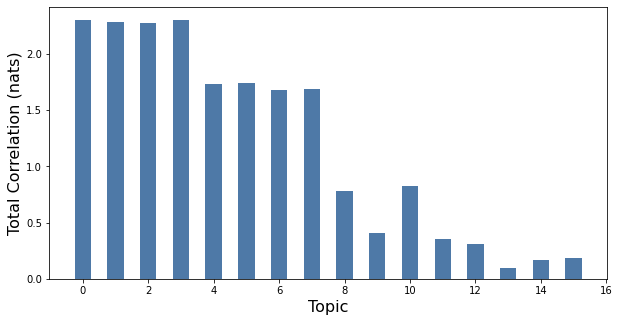

In [28]:
%matplotlib inline
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16)
plt.show()

In [29]:
topic_model.tc

19.12431825893841

In [32]:
topic_model.clusters, len(topic_model.clusters)

(array([ 9, 11, 10, ...,  8, 13, 13]), 77804)

In [34]:
topic_model.get_top_docs

<bound method Corex.get_top_docs of <corextopic.corextopic.Corex object at 0x7fa8b8ed0130>>

In [35]:
doc_word

<203482x77804 sparse matrix of type '<class 'numpy.int64'>'
	with 1364150 stored elements in Compressed Sparse Row format>

In [37]:
doc_matrix = pd.DataFrame(doc_word)


KeyboardInterrupt: 

In [43]:
topic_model.tcs

array([2.302008  , 2.28514311, 2.27704339, 2.30257878, 1.73637008,
       1.7454586 , 1.68084261, 1.68465032, 0.77817738, 0.40483233,
       0.82106646, 0.35332325, 0.31158971, 0.09568249, 0.16463467,
       0.1809171 ])

In [44]:
len(topic_model.tcs)

16